# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression line
from sklearn.linear_model import LinearRegression

# Import the OpenWeatherMap API key
# from api_keys import (weather_api_key, geoapify_key) #this doesn't work for some /microsoft/pyright/blob/main/docs/configuration.mdreason
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
# cities = []
cities = {}

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        # cities.append(city)
        cities.update({city: [lat_lng[0], lat_lng[1]]})
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(f"Cities list: {cities}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URLs
weatherUrl = "https://api.openweathermap.org/data/3.0/onecall"
geoUrl = "http://api.openweathermap.org/geo/1.0/reverse"

# Define an empty list to fetch the weather data for each city
city_data = []
apiResponse = []
import json

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
for i, (city, latLng) in enumerate(cities.items()):

    set_count += 1
    record_count = 0

    # Create endpoint URL with each city
    city_url = weatherUrl + f"?lat={latLng[0]}&lon={latLng[1]}&dt={1586468027}&units=imperial&appid={weather_api_key}"
    
    print(f"count: {i}, city: {city}, lat: {latLng[0]}, lng: {latLng[1]}")
    print(f"city_url: {city_url}")
    
    # Log the url, record, and set numbers
    # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_data = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['lat']
        city_lng = weather_data['lon']
        city_max_temp = weather_data['daily'][0]['temp']['max']
        city_humidity = weather_data['daily'][0]['humidity']
        city_clouds = weather_data['daily'][0]['clouds']
        city_wind = weather_data['daily'][0]['wind_speed']

        # Use Geographic API to get Country code
        geo_url = geoUrl + f"?lat={city_lat}&lon={city_lng}&appid={weather_api_key}"
        geo = requests.get(geo_url)
        geo_data = geo.json()
        if geo_data:

            city_country = geo_data[0]['country']
            city_date = weather_data['daily'][0]['dt']

            # Append the City information into city_data list
            city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date
                            })
        
            # Group cities in sets of 50 for logging purposes
            if (i % 50 == 0 and i >= 50):
                print(f"weather_data: {weather_data}")
                print(city_url)

    # # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

print(f'city_data: {city_data}')

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
count: 0, city: tarariras, lat: -34.16184577345986, lng: -57.49280151521231
city_url: https://api.openweathermap.org/data/3.0/onecall?lat=-34.16184577345986&lon=-57.49280151521231&dt=1586468027&units=imperial&appid=5f58a1541c03a6ee538056c61e92fea3
count: 1, city: port-aux-francais, lat: -56.939518188404726, lng: 78.5873440779198
city_url: https://api.openweathermap.org/data/3.0/onecall?lat=-56.939518188404726&lon=78.5873440779198&dt=1586468027&units=imperial&appid=5f58a1541c03a6ee538056c61e92fea3
count: 2, city: georgetown, lat: -18.514038487654915, lng: -19.15236505392582
city_url: https://api.openweathermap.org/data/3.0/onecall?lat=-18.514038487654915&lon=-19.15236505392582&dt=1586468027&units=imperial&appid=5f58a1541c03a6ee538056c61e92fea3
count: 3, city: edinburgh of the seven seas, lat: -75.1604033588713, lng: -2.1534090722742008
city_url: https://api.openweathermap.org/data/3.0/onecall?lat=-75.1604033588713&lon=-2.153409

In [44]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)

# Show Record Count
city_data_df.count()

             City      Lat       Lng  Max Temp  Humidity  Cloudiness   
0       tarariras -34.1618  -57.4928     60.04        76          91  \
1          sittwe  20.2850   93.4857     75.58        98         100   
2          cacoal -11.5763  -61.6890     90.21        42           0   
3            homs  34.6863   36.7023     91.38        22           0   
4          fuding  27.7232  119.8090     69.66        99         100   
..            ...      ...       ...       ...       ...         ...   
303        mayuge   0.1341   33.5755     72.54        82          87   
304         muana  -0.8372  -49.2498     85.53        66          34   
305      alajarvi  63.2352   23.7857     70.38        57          88   
306  dalandzadgad  44.3706  104.6890     89.19        19         100   
307       caetite -13.8591  -42.4075     78.17        44           5   

     Wind Speed Country        Date  
0          9.04      UY  1687446000  
1          3.00      MM  1687498200  
2          4.56      

City          308
Lat           308
Lng           308
Max Temp      308
Humidity      308
Cloudiness    308
Wind Speed    308
Country       308
Date          308
dtype: int64

In [45]:

# Show Record Count
city_data_df.count()

City          308
Lat           308
Lng           308
Max Temp      308
Humidity      308
Cloudiness    308
Wind Speed    308
Country       308
Date          308
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tarariras,-34.1618,-57.4928,60.04,76,91,9.04,UY,1687446000
1,sittwe,20.2850,93.4857,75.58,98,100,3.00,MM,1687498200
2,cacoal,-11.5763,-61.6890,90.21,42,0,4.56,BR,1687449600
3,homs,34.6863,36.7023,91.38,22,0,18.28,SY,1687510800
4,fuding,27.7232,119.8090,69.66,99,100,3.87,CN,1687492800


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarariras,-34.1618,-57.4928,60.04,76,91,9.04,UY,1687446000
1,sittwe,20.2850,93.4857,75.58,98,100,3.00,MM,1687498200
2,cacoal,-11.5763,-61.6890,90.21,42,0,4.56,BR,1687449600
3,homs,34.6863,36.7023,91.38,22,0,18.28,SY,1687510800
4,fuding,27.7232,119.8090,69.66,99,100,3.87,CN,1687492800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

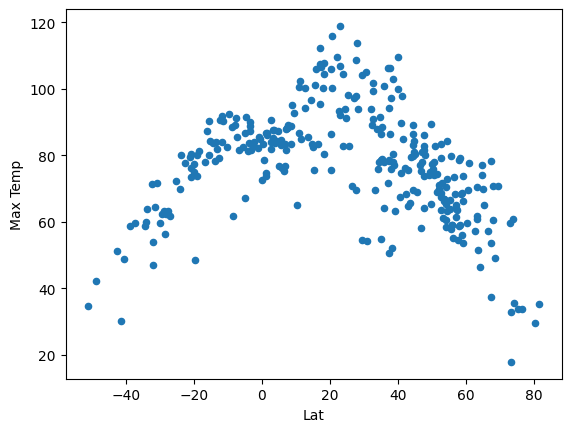

In [49]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(
   x='Lat', 
   y='Max Temp', 
   kind='scatter'
)

# Incorporate the other graph properties
# Creating a Linear Regression model on our data
# lin = LinearRegression()
# lin.fit(city_data_df[['Lat']], city_data_df['Max Temp'])
# # Creating a plot
# ax = city_data_df.plot.scatter(x='Lat', y='Max Temp', alpha=.1)
# ax.plot(city_data_df['Lat'], lin.predict(city_data_df[['Max Temp']]), c='r')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

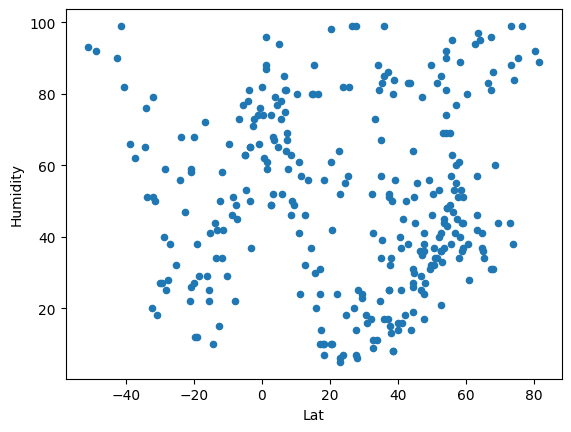

In [50]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(
    x='Lat',
    y='Humidity',
    kind='scatter'
)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

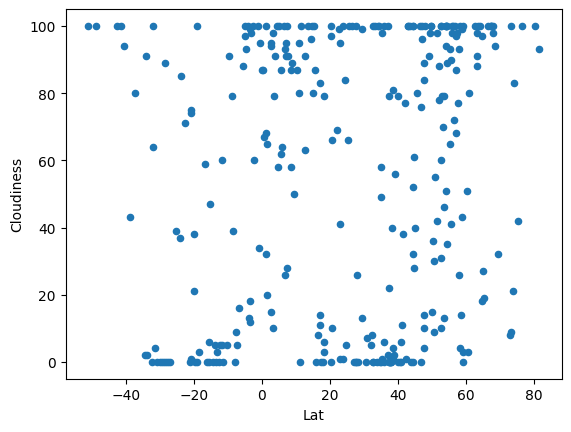

In [51]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(
    x='Lat',
    y='Cloudiness',
    kind='scatter'
)

# Incorporate the other graph properties
# what properties?

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

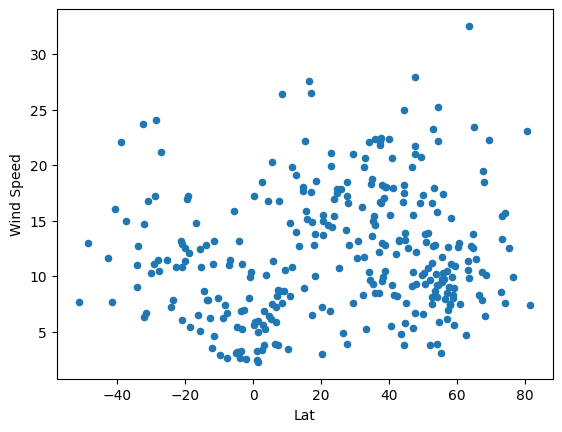

In [52]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(
    x='Lat',
    y='Wind Speed',
    kind='scatter'
)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
# def linearRegressionLat(y):
#     return np.polyfit(city_data_df['Lat'], city_data_df[y],1)
def plot_linear_regression(x_values, y_values, title, text_coordinates, figureNumber):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")

    # Save the figure
    plt.savefig(f"../output_data/Fig{figureNumber}.png")

    plt.show()

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'].gt(0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sittwe,20.2850,93.4857,75.58,98,100,3.00,MM,1687498200
3,homs,34.6863,36.7023,91.38,22,0,18.28,SY,1687510800
4,fuding,27.7232,119.8090,69.66,99,100,3.87,CN,1687492800
7,puerto lempira,14.8302,-83.0777,83.28,80,100,18.05,NI,1687453200
8,port nelson,23.8114,-74.7541,82.81,82,100,16.91,BS,1687453200


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'].le(0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarariras,-34.1618,-57.4928,60.04,76,91,9.04,UY,1687446000
2,cacoal,-11.5763,-61.6890,90.21,42,0,4.56,BR,1687449600
5,nampula,-15.3194,39.6849,84.38,41,47,10.80,MZ,1687510800
6,maun,-21.0913,22.9880,79.34,22,0,13.18,BW,1687514400
23,galesong,-5.6039,117.3192,82.38,77,88,15.86,ID,1687492800


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4002833347189213


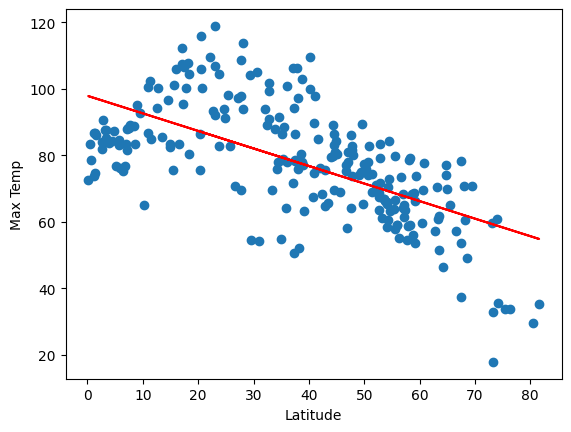

In [77]:
from numpy import *
import numpy as np
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Max Temp"]

# Linear regression on Northern Hemisphere
#nhFit = np.polyfit(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],1)
#nhId = np.poly1d(nhFit)

axn = northern_hemi_df.plot.scatter(x = 'Lat', y='Max Temp')
#northern_hemi_df.plot(x='Lat', y='Humidity',color='Red', ax=axn)
plot_linear_regression(x,y,'Max Temp',(6,-10),5)

The r-value is: 0.7052553372589593


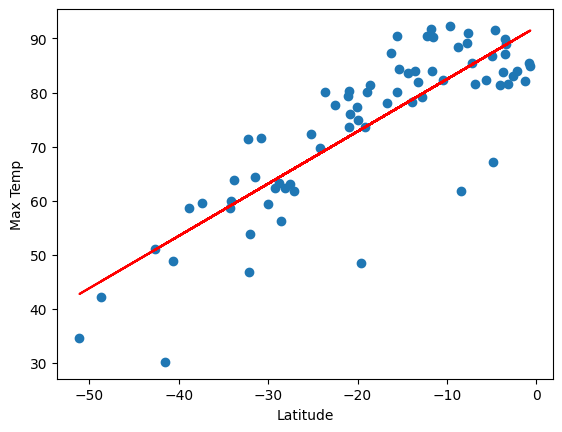

In [78]:
# Linear regression on Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]

axs = southern_hemi_df.plot.scatter(x = 'Lat', y='Max Temp')
plot_linear_regression(x,y,'Max Temp',(6,-10),6)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the Suthern hemisphere, the further you go south, the hotter it becomes. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0002493761949187182


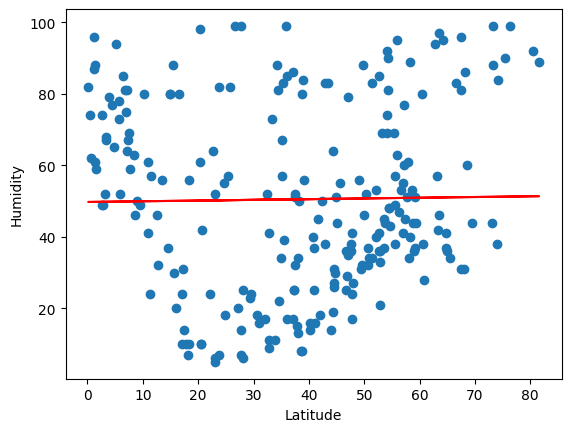

In [79]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Humidity"]

axn = northern_hemi_df.plot.scatter(x = 'Lat', y='Humidity')
plot_linear_regression(x,y,'Humidity',(6,-10),7)


The r-value is: 0.012681407165077966


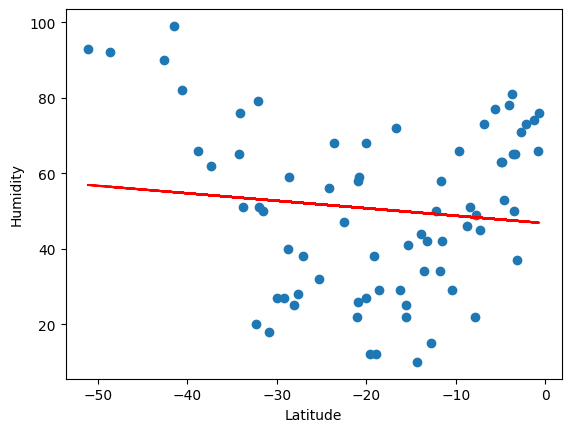

In [80]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Humidity"]

axn = southern_hemi_df.plot.scatter(x = 'Lat', y='Humidity')
plot_linear_regression(x,y,'Humidity',(6,-10),8)

Higher latitudes have experience more humidity. Temperatures directly influence the moisture holding capacity of the atmosphere.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002441357466201743


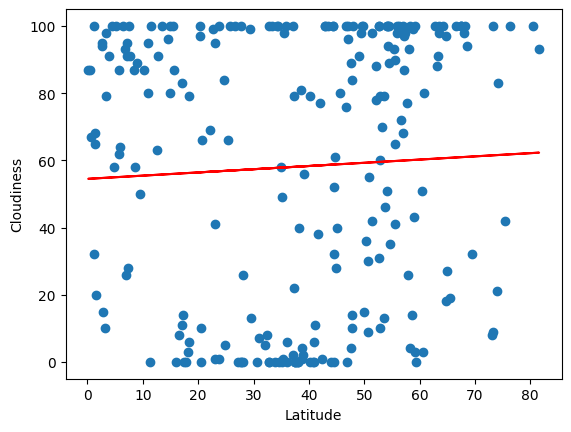

In [85]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Cloudiness"]

axn = northern_hemi_df.plot.scatter(x = 'Lat', y='Cloudiness')
plot_linear_regression(x,y,'Cloudiness',(6,-10),9)

The r-value is: 0.0010965556891755802


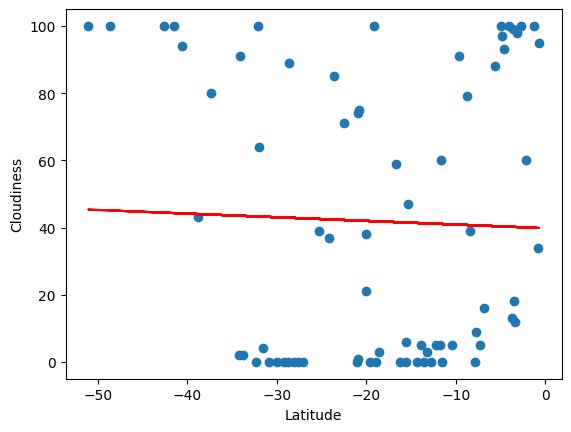

In [89]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Cloudiness"]

axn = southern_hemi_df.plot.scatter(x = 'Lat', y='Cloudiness')
plot_linear_regression(x,y,'Cloudiness',(6,-10),10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Clouds are rare  and deserts are common between 15 and 30 degrees north and south of the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004231161695288695


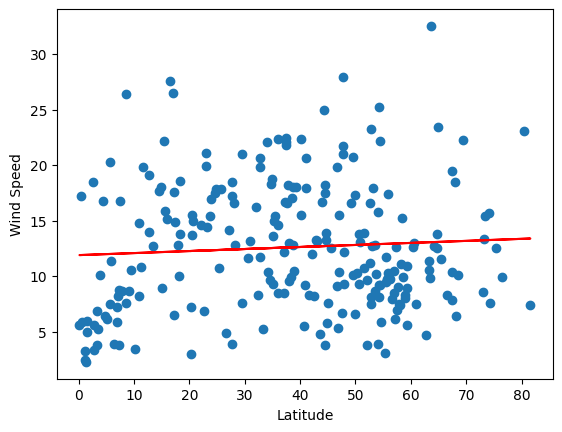

In [92]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Wind Speed"]

axn = northern_hemi_df.plot.scatter(x = 'Lat', y='Wind Speed')
plot_linear_regression(x,y,'Wind Speed',(6,-10),11)

The r-value is: 0.21191196697173798


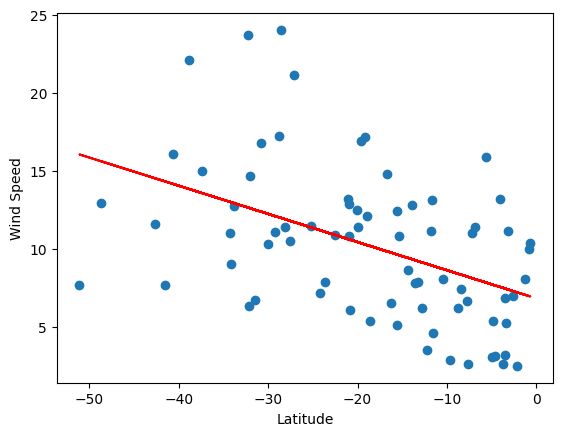

In [ ]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Wind Speed"]

axn = southern_hemi_df.plot.scatter(x = 'Lat', y='Wind Speed')
plot_linear_regression(x,y,'Wind Speed',(6,-10),12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Regions near the equator are characterized by low winds, while mid latitudes experience much faster airflow. 